In [1]:
import matplotlib.pyplot as plt
import xarray as xr

from diffpy.srfit.pdf.characteristicfunctions import sphericalCF
from pdffitx.model import MultiPhaseModel, plot_fits
from pdffitx.io import load_crystal, load_profile

Load the crystal structure of nickel (fcc). The `Crystal` object holds the information about the structure like lattice and atom positions.

In [4]:
crystal1 = load_crystal("Ni_cif_file.cif")
crystal2 = load_crystal("Ni_cif_file.cif")

Load the data and metadata of the PDF of nickel powder. The `"Ni_gr_file.gr"` is the path to the data file which has two columns of numbers. The `{"qdamp": 0.04, "qbroad": 0.02}` is the metadata to add to the profile.


The `Profile` object holds the independent variables and dependent variables inside and also the metadata.

In [5]:
profile = load_profile("Ni_gr_file.gr", {"qdamp": 0.04, "qbroad": 0.02})

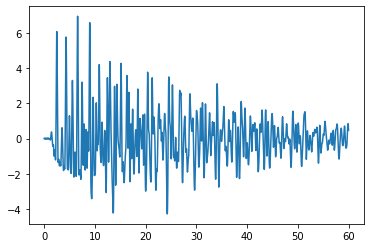

In [6]:
plt.plot(profile.xobs, profile.yobs)
plt.show()

In [7]:
profile.meta

{'stype': 'X',
 'qmin': 0.0,
 'qmax': 24.0,
 'filename': 'Ni_gr_file.gr',
 'bank': 0,
 'nbanks': 1,
 'qdamp': 0.04,
 'qbroad': 0.02}

Create a attenuated crystal model based on the nickel structure and the spherical characteristic function.

The equation to calculate is `"sphere * Ni"`. In the equation, the `"Ni"` is the PDF of the nickel (fcc) structure and the `"sphere"` is the returned value (a numpy array) of the sphericalCF function.

In [9]:
model = MultiPhaseModel("sphere1 * Ni1 + sphere2 * Ni2", {"Ni1": crystal1, "Ni2": crystal2}, {"sphere1": sphericalCF, "sphere2": sphericalCF})

Set the data to refine in the model.

In [10]:
model.set_profile(profile)

Set the range of fitting from 2.2 to 12.2 with s step of 0.01

In [11]:
model.set_xrange(2.2, 12.2, 0.01)

Set values of psize to be non-negative.

In [21]:
model.set_value(sphere1_psize=1000, sphere2_psize=100)

Show all the parameters in the model.

In [22]:
model.show()

Parameters
------------------------------------------------------------------------------
sphere1_psize   1000
sphere2_psize   100
Ni1_scale       1e-10
Ni1_delta2      1e-10
Ni1_a           3.50803634
Ni1_Ni0_Biso    0.5
Ni2_scale       1.5001161193847657e-08
Ni2_delta2      1e-10
Ni2_a           3.508036392273815
Ni2_Ni0_Biso    0.5000000298023224

MultiPhaseModel.x               [ 2.2   2.21  2.22 ... 12.18 12.19 12.2 ]
MultiPhaseModel.y               [-1.09188 -1.14898 -1.19095 ... -3.04106 -3.06
MultiPhaseModel.dy              [1. 1. 1. ... 1. 1. 1.]
MultiPhaseModel.sphere1_psize   1000
MultiPhaseModel.sphere2_psize   100

MultiPhaseModel.Ni1.delta1  0.0
MultiPhaseModel.Ni1.delta2  1e-10
MultiPhaseModel.Ni1.qbroad  0.02
MultiPhaseModel.Ni1.scale   1e-10
MultiPhaseModel.Ni1.qdamp   0.04

MultiPhaseModel.Ni1.phase.a         3.50803634
MultiPhaseModel.Ni1.phase.b         3.50803634
MultiPhaseModel.Ni1.phase.c         3.50803634
MultiPhaseModel.Ni1.phase.alpha     1.5707963267948966
M

Set the value of `sphere_psize` to be 1000.

Set the order of the parameters to be refined.

The list `"scale", "lat", ["adp", "delta"], "sphere"` contains the tags of the parameters. You can also directly use the name of the parameters in the model.

In [23]:
model.set_order("scale", "lat", ["adp", "delta"], ["sphere1", "sphere2"])

Set the model be be verbose.

In [24]:
model.set_verbose(1)

Optimize the model

In [25]:
model.optimize()

Start fit with all parameters fixed.
Round 1 / 4: Free scale ...
`ftol` termination condition is satisfied.
Function evaluations 2, initial cost 2.2904e+03, final cost 2.2904e+03, first-order optimality 1.09e+04.
Round 2 / 4: Free lat ...
`ftol` termination condition is satisfied.
Function evaluations 29, initial cost 2.2904e+03, final cost 2.8860e+01, first-order optimality 2.26e+00.
Round 3 / 4: Free adp, delta ...
`ftol` termination condition is satisfied.
Function evaluations 25, initial cost 2.8860e+01, final cost 4.7884e+00, first-order optimality 4.43e+00.
Round 4 / 4: Free sphere1, sphere2 ...
`xtol` termination condition is satisfied.
Function evaluations 17, initial cost 4.7884e+00, final cost 4.7504e+00, first-order optimality 1.61e+01.
Optimization result: Rw = 0.045591.


Plot the fits.

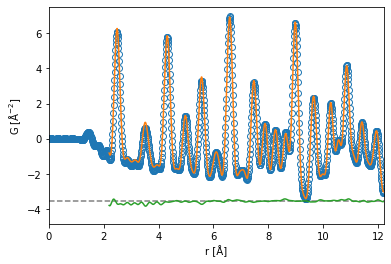

In [26]:
model.plot()
plt.show()

Update the results and save it in a directory. The `update` is to calculate the correlation matrix of the parameters which is usually slow. It only needs to be done once after the results are settled down.

In [40]:
model.show()

Parameters
------------------------------------------------------------------------------
sphere1_psize   621.703793119215
sphere2_psize   310.8518965596075
Ni1_scale       0.3214794824808493
Ni1_delta2      1.6640481800237046
Ni1_a           3.5255622448053296
Ni1_Ni0_Biso    0.4673214331882104
Ni2_scale       0.03879697366124613
Ni2_delta2      0.08891674330396813
Ni2_a           3.517086909952458
Ni2_Ni0_Biso    0.2136973106796097

MultiPhaseModel.x               [ 2.2   2.21  2.22 ... 12.18 12.19 12.2 ]
MultiPhaseModel.y               [-1.09188 -1.14898 -1.19095 ... -3.04106 -3.06
MultiPhaseModel.dy              [1. 1. 1. ... 1. 1. 1.]
MultiPhaseModel.sphere1_psize   621.703793119215
MultiPhaseModel.sphere2_psize   310.8518965596075

MultiPhaseModel.Ni1.delta1  0.0
MultiPhaseModel.Ni1.delta2  1.6640481800237046
MultiPhaseModel.Ni1.qbroad  0.02
MultiPhaseModel.Ni1.scale   0.3214794824808493
MultiPhaseModel.Ni1.qdamp   0.04

MultiPhaseModel.Ni1.phase.a         3.5255622448053296
Mult

In [27]:
model.update()
model.save_all("result", "Ni")

Let's see what are inside this folder.

In [28]:
!tree result

result
├── Ni.txt
├── Ni_Ni.cif
├── Ni_Ni1.cif
├── Ni_Ni2.cif
├── Ni_fits.nc
└── Ni_result.nc

0 directories, 6 files


The arrays of the fitted data.

In [29]:
fits = xr.load_dataset("result/Ni_fits.nc")
fits

<xarray.Dataset>
Dimensions:  (x: 1001, xobs: 6001)
Coordinates:
  * x        (x) float64 2.2 2.21 2.22 2.23 2.24 ... 12.17 12.18 12.19 12.2
  * xobs     (xobs) float64 0.0 0.01 0.02 0.03 0.04 ... 59.97 59.98 59.99 60.0
Data variables:
    y        (x) float64 -1.092 -1.149 -1.191 -1.212 ... -3.041 -3.067 -3.065
    ycalc    (x) float64 -0.8139 -0.8568 -0.894 -0.92 ... -2.979 -3.008 -3.008
    yobs     (xobs) float64 0.0 0.007123 0.01382 0.01973 ... 0.5767 0.523 0.4683

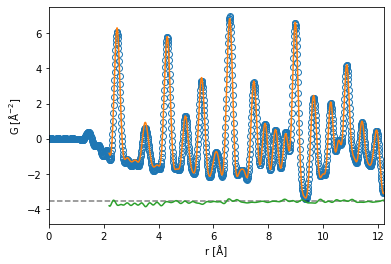

In [43]:
plot_fits(fits)

The result of fitting parameters.

In [48]:
result = xr.load_dataset("result/Ni_result.nc")
result

<xarray.Dataset>
Dimensions:       ()
Data variables:
    sphere_psize  float64 117.6
    Ni_scale      float64 0.3706
    Ni_delta2     float64 1.588
    Ni_a          float64 3.524
    Ni_Ni0_Biso   float64 0.4386
    rw            float64 0.04797

The cif file of the refined structure.

In [49]:
!cat result/Ni_Ni.cif

data_Ni4

_computing_structure_solution     'FOX http://objcryst.sourceforge.net'

_symmetry_space_group_name_H-M    'F m -3 m'
_symmetry_space_group_name_Hall   '-F 4 2 3'

_cell_length_a     3.52406
_cell_length_b     3.52406
_cell_length_c     3.52406
_cell_angle_alpha  90.000
_cell_angle_beta   90.000
_cell_angle_gamma  90.000
_cell_volume        43.77
loop_
    _atom_site_label
    _atom_site_type_symbol
    _atom_site_fract_x
    _atom_site_fract_y
    _atom_site_fract_z
    _atom_site_U_iso_or_equiv
    _atom_site_occupancy
    _atom_site_adp_type
    Ni0        Ni        0.000000  0.000000  0.000000  0.005555 1.0000 Uiso

#  Dynamical occupancy corrections found by ObjCryst++:
#  values below 1. (100%) indicate a correction,
#  which means either that the atom is on a special position,
#  or that it is overlapping with another identical atom.
#   Ni0              : 0.0208
#


The txt file is a readable file of the fitting parameters that contains more info about the fitting.

In [50]:
!cat result/Ni.txt

Results written: Wed Jul  7 12:01:40 2021
produced by sst

Some quantities invalid due to missing profile uncertainty
Overall (Chi2 and Reduced Chi2 invalid)
------------------------------------------------------------------------------
Residual       10.54251209
Contributions  10.54251209
Restraints     0.00000000
Chi2           10.54251209
Reduced Chi2   0.01058485
Rw             0.04797354

Variables (Uncertainties invalid)
------------------------------------------------------------------------------
Ni_Ni0_Biso   4.38598679e-01 +/- 1.67809140e-02
Ni_a          3.52406249e+00 +/- 7.18633638e-04
Ni_delta2     1.58803884e+00 +/- 5.06792654e-01
Ni_scale      3.70581385e-01 +/- 1.71607497e-02
sphere_psize  1.17610207e+02 +/- 5.21671016e+01

Variable Correlations greater than 25% (Correlations invalid)
------------------------------------------------------------------------------
corr(sphere_psize, Ni_scale)      -0.8767
corr(sphere_psize, Ni_delta2)     0.5730
corr(Ni_scale, Ni_delta2)

It can also be used to load the parameter values into a fresh created model.

In [51]:
new_model = MultiPhaseModel("sphere * Ni", {"Ni": crystal}, {"sphere": sphericalCF})

In [52]:
new_model.load("result/Ni.txt")

In [53]:
new_model.show()

Parameters
------------------------------------------------------------------------------
sphere_psize    117.610207
Ni_scale        0.370581385
Ni_delta2       1.58803884
Ni_a            3.52406249
Ni_Ni0_Biso     0.438598679

MultiPhaseModel.x               None
MultiPhaseModel.y               None
MultiPhaseModel.dy              None
MultiPhaseModel.sphere_psize    117.610207

MultiPhaseModel.Ni.delta1   0.0
MultiPhaseModel.Ni.delta2   1.58803884
MultiPhaseModel.Ni.qbroad   0.0
MultiPhaseModel.Ni.scale    0.370581385
MultiPhaseModel.Ni.qdamp    0.0

MultiPhaseModel.Ni.phase.a      3.52406249
MultiPhaseModel.Ni.phase.b      3.52406249
MultiPhaseModel.Ni.phase.c      3.52406249
MultiPhaseModel.Ni.phase.alpha  1.5707963267948966
MultiPhaseModel.Ni.phase.beta   1.5707963267948966
MultiPhaseModel.Ni.phase.gamma  1.5707963267948966

MultiPhaseModel.Ni.phase.Ni0.x      0.0
MultiPhaseModel.Ni.phase.Ni0.y      0.0
MultiPhaseModel.Ni.phase.Ni0.z      0.0
MultiPhaseModel.Ni.phase.Ni0.occ    1.

Constrain the variable

In [44]:
model._recipe.constrain("sphere1_psize", "sphere2_psize")

Constrain the variable

In [43]:
model._recipe.unconstrain("sphere1_psize")